<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorios N°01

## Objetivos del laboratorio

* Reforzar conceptos básicos de regresión lineal.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Anscombe.svg/1200px-Anscombe.svg.png" width="360" height="360" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
# cargar datos
df = pd.read_csv(os.path.join("data","anscombe.csv"), sep=",")
df.head()

,x,y,grupo
0,10,8.04,Grupo_1
1,8,6.95,Grupo_1
2,13,7.58,Grupo_1
3,9,8.81,Grupo_1
4,11,8.33,Grupo_1


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.
2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.
3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.
4. Calcule los resultados de las métricas para cada grupo. Interprete.
5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

1. Graficar cada grupo en un scatterplot

<AxesSubplot:xlabel='x', ylabel='y'>

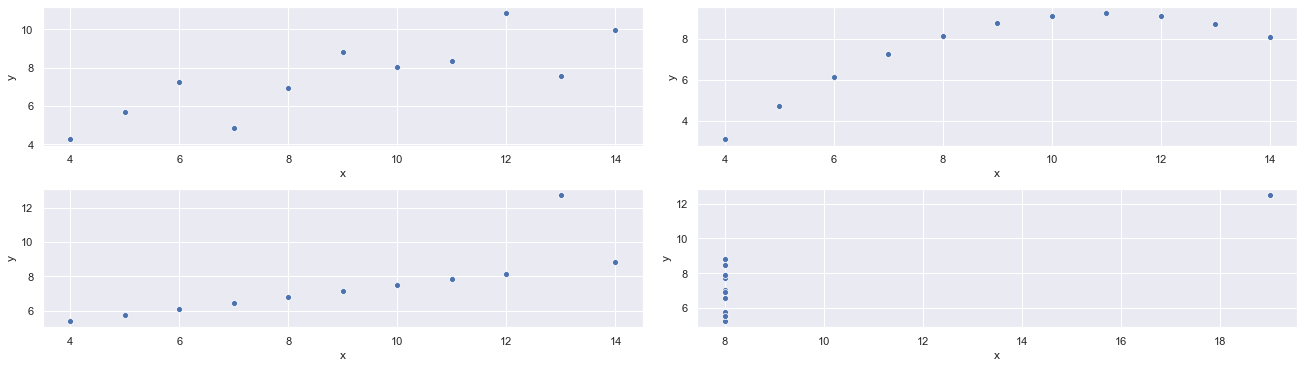

In [4]:
sns.set(rc={'figure.figsize':(18,5)})
df_1  = df.loc[df['grupo'] == 'Grupo_1']
df_2  = df.loc[df['grupo'] == 'Grupo_2']
df_3  = df.loc[df['grupo'] == 'Grupo_3']
df_4  = df.loc[df['grupo'] == 'Grupo_4']

fig2 = plt.figure(constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=2, nrows=2, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[0, 1])
f2_ax3 = fig2.add_subplot(spec2[1, 0])
f2_ax4 = fig2.add_subplot(spec2[1, 1])
sns.scatterplot(x = 'x', y = 'y', data = df_1, ax= f2_ax1)
sns.scatterplot(x = 'x', y = 'y', data = df_2, ax= f2_ax2)
sns.scatterplot(x = 'x', y = 'y', data = df_3, ax= f2_ax3)
sns.scatterplot(x = 'x', y = 'y', data = df_4, ax= f2_ax4)

2. Resumen de medidas  

In [92]:
df_1.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


In [93]:
df_2.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


In [94]:
df_3.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500000
std,3.316625,2.030424
min,4.000000,5.390000
25%,6.500000,6.250000
50%,9.000000,7.110000
75%,11.500000,7.980000
max,14.000000,12.740000


In [95]:
df_4.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.030579
min,8.000000,5.250000
25%,8.000000,6.170000
50%,8.000000,7.040000
75%,8.000000,8.190000
max,19.000000,12.500000


vemos que todos los datos para variables de respuesta Y tienen la misma media y varianza, pero es evidente que provienen de funciones/poblaciones diferentes. De todos modos, los percentiles y maximos son diferentes.
Al tener misma varianza y misma media las sumas de cuadrados de los residuos de las respectivas regresiones son idéntico, por lo que su coeficiente de deteminación R^2 serán iguales.

3. Realizar los ajustes lineales para cada caso

In [5]:
import statsmodels.api as sm
# Se calculan los modelos de regresión para los 4 grupos 

model1 = sm.OLS(df_1['y'], sm.add_constant(df_1['x']))
results1 = model1.fit()
model2 = sm.OLS(df_2['y'], sm.add_constant(df_2['x']))
results2 = model2.fit()
model3 = sm.OLS(df_3['y'], sm.add_constant(df_3['x']))
results3 = model3.fit()
model4 = sm.OLS(df_4['y'], sm.add_constant(df_4['x']))
results4 = model4.fit()
print(results1.summary())
print(results2.summary())
print(results3.summary())
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Sat, 07 Nov 2020   Prob (F-statistic):            0.00217
Time:                        01:21:45   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0001      1.125      2.667      0.0

C:\Users\Gabriel\miniconda3\envs\mat281\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
C:\Users\Gabriel\miniconda3\envs\mat281\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
C:\Users\Gabriel\miniconda3\envs\mat281\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
C:\Users\Gabriel\miniconda3\envs\mat281\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


Se aprecia que las regresiones en todos los casos tienen mismos parámetros, y al tener mismas sumas de cuadrados el estadístico F es igual para todos. En todos los casos se rechaza la hipótesis nula del ANOVA, pues el estadístico es mayor al percentil $F_{1,n-2,1-\alpha} = 5.12$ con n=2, $\alpha = 5\%$, por lo que se rechaza la hipótesis de nulidad de los coeficientes beta.

<AxesSubplot:xlabel='x', ylabel='y'>

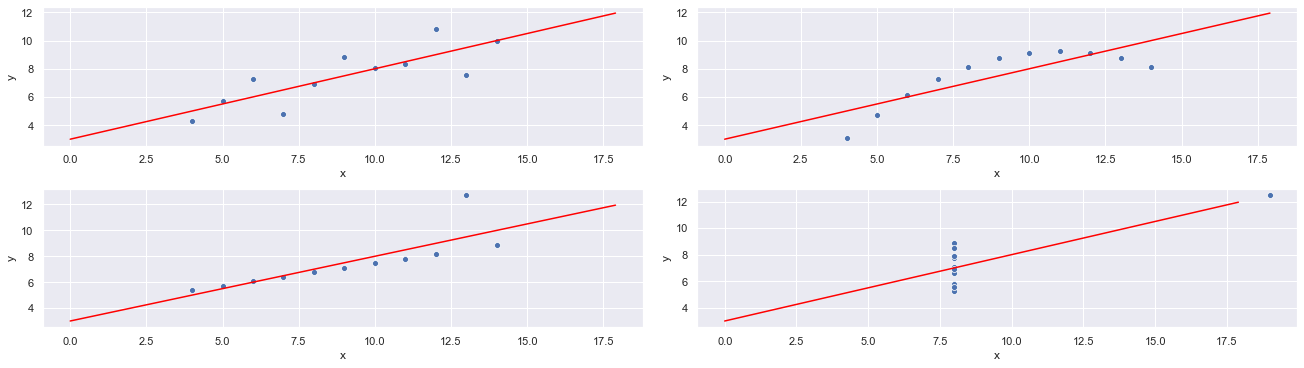

In [6]:
# se extraen los parámetros estimados de los modelos previamente obtenidos
b0_1 = results1.params[0]
b1_1 = results1.params[1]
b0_2 = results2.params[0]
b1_2 = results2.params[1]
b0_3 = results3.params[0]
b1_3 = results3.params[1]
b0_4 = results4.params[0]
b1_4 = results4.params[1]

#se procede a formar los gráficos de estimación según los parámetros estimados

x_range = np.arange(0,18,0.1)
        
df_plot1 = pd.DataFrame({'x':x_range,
                        'y':[b0_1 + b1_1*n for n in x_range]})
df_plot2 = pd.DataFrame({'x':x_range,
                        'y':[b0_2 + b1_2*n for n in x_range]})
df_plot3 = pd.DataFrame({'x':x_range,
                        'y':[b0_3 + b1_3*n for n in x_range]})
df_plot4 = pd.DataFrame({'x':x_range,
                        'y':[b0_4 + b1_4*n for n in x_range]})
  

fig3 = plt.figure(constrained_layout=True)
spec3 = gridspec.GridSpec(ncols=2, nrows=2, figure=fig3)
f3_ax1 = fig3.add_subplot(spec3[0, 0])
f3_ax2 = fig3.add_subplot(spec3[0, 1])
f3_ax3 = fig3.add_subplot(spec3[1, 0])
f3_ax4 = fig3.add_subplot(spec3[1, 1])
sns.scatterplot(x='x', y='y', data=df_1, ax=f3_ax1)
sns.lineplot(x='x', y='y', data=df_plot1,ax=f3_ax1,color="red")

sns.scatterplot(x='x', y='y', data=df_2, ax=f3_ax2)
sns.lineplot(x='x', y='y', data=df_plot2,ax=f3_ax2,color="red")

sns.scatterplot(x='x', y='y', data=df_3, ax=f3_ax3)
sns.lineplot(x='x', y='y', data=df_plot3,ax=f3_ax3,color="red")

sns.scatterplot(x='x', y='y', data=df_4, ax=f3_ax4)
sns.lineplot(x='x', y='y', data=df_plot4,ax=f3_ax4,color="red")

4. Resultados de las métricas para cada grupo


In [22]:
from metrics_regression import *
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

model_rl1 = LinearRegression() 
#model_rl1.fit(df_1['x'], df_1['y']) 

# ejemplo 
#df_temp = pd.DataFrame(
#    {
#        'y':df_1['y'],
#        'yhat': model_rl1.predict(df_1['x'])
#        }
#)
#df_metrics = summary_metrics(df_temp)
#df_metrics['r2'] =  round(r2_score(df_1['y'], model_rl1.predict(df_1['x'])),4)
#print('\nMetricas para el regresor consumo_litros_milla:\n')
#print(df_metrics)

este código no funciona, hay un error en model_rl1.

5. En primer lugar, al realizar una regresión lineal se desea probar alguna hipótesis de relación entre las variables aceptando una componente aleatoria, generalmente normal. Por este motivo, los gráficos que concentran casi la totalidad de variables de respuesta en un valor de x no se considere nunca para un estudio de regresión linea, el gráfico cuadrático es mas aceptable en ese sentido pero tampoco.
Con lo que respecta a los demás conjuntos de datos si tiene sentido probar una regresión lineal, pero en cuanto a los outliars se pueden estudiar los residuales del modelo de regresión, ver su distribución y bajo ese criterio se puede detectar si es un valor completamente anormal e.g. para residuales $N(0,\sigma^2)$ se puede utilizar un criterio de que tan improbable es que exista, usando por ejemplo una banda de $3\sigma^2$.